### Entrega 2, acondicionando los datos

In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.nan)

import glob
import librosa
import librosa.display

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Funciones a usar para la extraccion de la data

In [2]:
def extract_feature(file_name):
    
    X, sample_rate = librosa.load(file_name, sr=None, mono=True, duration = 3)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0)
    
    return mfccs, chroma,mel,contrast,tonnetz

In [3]:
def parse_audio_files(filenames):
    rows = len(filenames)
    features, labels = np.zeros((rows, 193)), np.zeros((rows, 2))
    i = 0

    for fn in filenames:
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
            ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
            y_col = int(fn.split('/')[4].split('-')[1])
            print("ycol = ", y_col)
        except:
            print(fn)
        else:
            #print("estamos en onehot")
            #y_col = np_utils.to_categorical(y_col)
            # One Hot
            features[i] = ext_features
            labels[i, y_col] = 1
            i += 1
    return features, labels

Leemos el archivo de audio en series de tiempo y ademas extramos su sample_rate. En los parametros tenemos la ruta, mantemos el sample de rate de origen, convertimos el audio a un solo canal y definimos la duracion.

In [4]:
audio = '../../audioset/audio/sonido.wav'
X, sample_rate = librosa.load(audio, sr=None, mono=True, duration = 3)
print("Sample Rate = ",sample_rate)
#librosa.load?

Sample Rate =  44100


Aplicamos la transformada de fourier al audio. Esta Transforma una señal representada en el dominio del tiempo al dominio de la frecuencia pero sin alterar su contenido de información, sólo es una forma diferente de representarla. 

In [5]:
stft = np.abs(librosa.stft(X))
stft.shape
#librosa.stft?

(1025, 54)

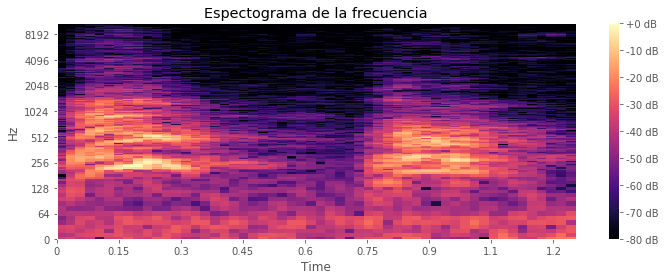

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time')
plt.title('Espectograma de la frecuencia')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

Extramos los coeficientes ceptrales de Mel para el analisis de la voz en la voz humana.

In [7]:
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
mfccs
#librosa.feature.mfcc?

array([-2.71176304e+02,  1.67010231e+02,  8.78018926e+00, -1.68975116e+01,
       -1.63575813e+01, -4.06196112e-01, -8.23776042e+00,  1.76120070e+00,
        5.01476310e+00,  7.74200294e-01, -9.13697728e+00, -1.81635741e+00,
       -5.27207504e+00,  1.00425442e+01,  4.41644312e+00,  1.18895070e+01,
        1.33918179e+01,  1.38581329e+01,  3.48992078e+00,  1.05011637e+00,
        3.88564683e+00,  5.09729282e+00, -8.25811837e+00, -3.15234717e+00,
        1.76541396e-01,  8.92799812e-01,  4.97462153e-01, -3.14395773e+00,
        2.98015692e+00, -1.21783453e+00,  2.87540059e-01,  4.43561033e+00,
        1.32862418e+00, -2.96592577e+00,  2.35329889e+00, -2.80566849e+00,
       -2.33119380e-01, -2.13117043e+00, -4.80107387e-01,  1.96473866e+00])

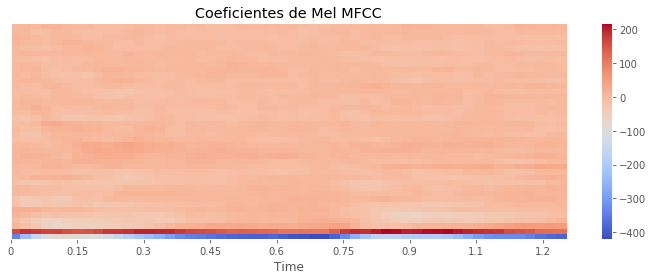

In [8]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40), x_axis='time')
plt.colorbar()
plt.title('Coeficientes de Mel MFCC')
plt.tight_layout()

Aplicamos el analisis chroma para tener mas caracteristicas del audio. https://en.wikipedia.org/wiki/Chroma_feature

In [9]:
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
chroma
#librosa.feature.chroma_stft?

array([0.7396115 , 0.69744613, 0.64062886, 0.58759628, 0.45266145,
       0.41272305, 0.42791836, 0.49075355, 0.56808284, 0.65490438,
       0.78966376, 0.80982806])

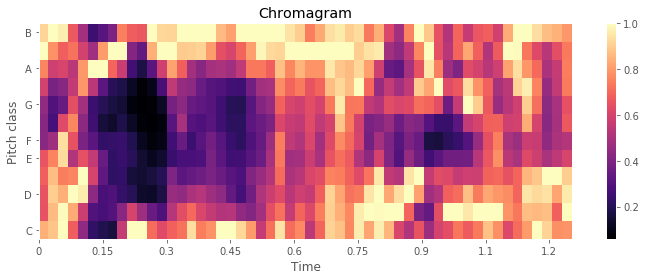

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.feature.chroma_stft(S=stft, sr=sample_rate), y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

Sacamos los atributos del espectograma de Mel.

In [11]:
mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
mel
#librosa.feature.melspectrogram?

array([6.99673528e-01, 8.50984657e-01, 1.10446261e+00, 5.00316658e-01,
       1.19862629e-01, 1.25288273e-01, 2.24612133e-01, 1.75153843e-01,
       5.10633365e-01, 6.56915987e-01, 4.86937710e-01, 2.75972552e+00,
       1.20235026e+01, 2.71274315e+01, 7.06474318e+01, 6.68647778e+01,
       4.82472746e+01, 5.55122123e+01, 2.57825605e+01, 2.07384827e+01,
       8.72698835e+00, 2.35799635e+00, 2.11929750e+00, 2.47850309e+00,
       2.66181298e+00, 5.20186707e+00, 1.24693165e+01, 9.14042443e+00,
       9.50192158e+00, 1.71219212e+01, 1.94059922e+01, 2.68021723e+01,
       1.90412400e+01, 3.13633908e+01, 2.27142762e+01, 9.57619766e+00,
       8.10591655e+00, 5.83213655e+00, 6.47444867e+00, 5.64389771e+00,
       2.92865286e+00, 2.55601332e+00, 1.48681273e+00, 7.91443895e-01,
       9.49758446e-01, 9.44054955e-01, 9.77462004e-01, 1.00672048e+00,
       1.41500942e+00, 4.55812961e+00, 8.88705130e+00, 3.90138089e+00,
       2.15874288e+00, 9.14656914e-01, 1.07867117e+00, 4.55428198e-01,
      

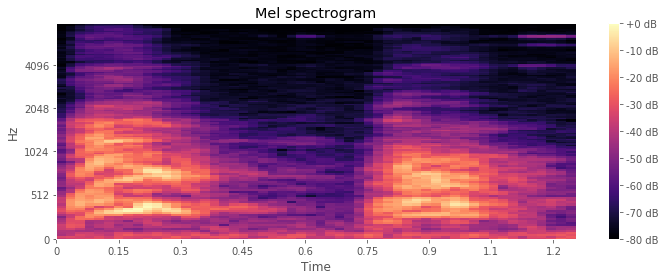

In [12]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(X, sr=sample_rate), ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

Sacamos el contraste espectral, el cual nos permite tener mas atributos del audio. Estos atributos se explican mejor en: https://ieeexplore.ieee.org/document/1035731/

In [13]:
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
contrast
#librosa.feature.spectral_contrast?

array([10.55000146,  8.94760866, 14.95571644, 17.20737485, 17.2986145 ,
       16.37138715, 19.7485061 ])

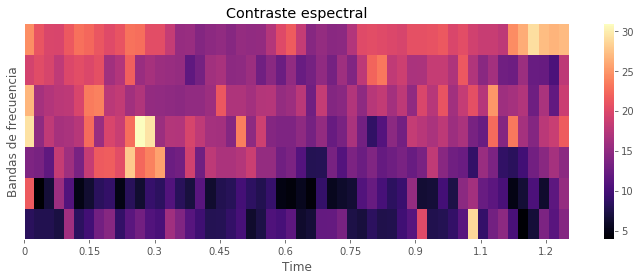

In [14]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.feature.spectral_contrast(S=stft, sr=sample_rate), x_axis='time')
plt.colorbar()
plt.ylabel('Bandas de frecuencia')
plt.title('Contraste espectral')
plt.tight_layout()

Sacamos los atributos a partir de las relaciones armonicas. (Tonnetz)

In [15]:
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0)
tonnetz
#librosa.feature.tonnetz?

array([ 0.00991545,  0.01295901,  0.02732455, -0.07332822,  0.0271032 ,
       -0.00694819])

Text(0.5,1,'Centroides de tono(Tonnetz)')

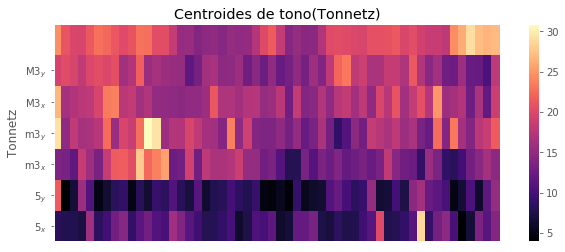

In [16]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.feature.spectral_contrast(S=stft, sr=sample_rate), y_axis='tonnetz')
plt.colorbar()
plt.title('Centroides de tono(Tonnetz)')

## Comparativa de todas las graficas.

Text(0.5,1,'Centroides de tono(Tonnetz)')

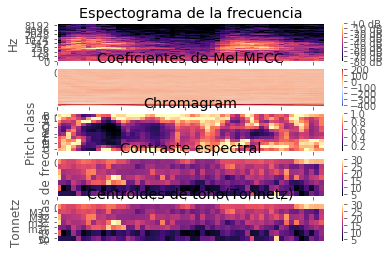

In [17]:
plt.figure()

plt.subplot(5, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time')
plt.title('Espectograma de la frecuencia')
plt.colorbar(format='%+2.0f dB')

plt.subplot(5, 1, 2)
librosa.display.specshow(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40), x_axis='time')
plt.colorbar()
plt.title('Coeficientes de Mel MFCC')

plt.subplot(5, 1, 3)
librosa.display.specshow(librosa.feature.chroma_stft(S=stft, sr=sample_rate), y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')

plt.subplot(5, 1, 4)
librosa.display.specshow(librosa.feature.spectral_contrast(S=stft, sr=sample_rate), x_axis='time')
plt.colorbar()
plt.ylabel('Bandas de frecuencia')
plt.title('Contraste espectral')

plt.subplot(5, 1, 5)
librosa.display.specshow(librosa.feature.spectral_contrast(S=stft, sr=sample_rate), y_axis='tonnetz')
plt.colorbar()
plt.title('Centroides de tono(Tonnetz)')

In [18]:
# Rutas
path_main = '../../audioset'
path_audio = path_main + '/audio'
path_metadata = path_main + '/metadata'

In [19]:
# Metadata
metadata = pd.read_csv(path_metadata + '/metadata.csv')
metadata.head()

,nombre_archivo,id,classID,clase
0,sonido.wav,1,1,ruido
1,sonido-(1).wav,2,1,ruido
2,sonido-(2).wav,3,2,voz
3,sonido-(3).wav,4,3,voz
4,sonido-(4).wav,5,1,ruido


In [20]:
# Construyendo ruta de audio

metadata['src_audio'] = path_audio + metadata['nombre_archivo']

In [21]:
audio_files = metadata['src_audio']
print('Metadata - Data to Process = ')
print(len(audio_files))

X, y = parse_audio_files(audio_files)
np.savez('metadata-procesada', X=X, y=y)

Metadata - Data to Process = 
8
../../audioset/audiosonido.wav
../../audioset/audiosonido-(1).wav
../../audioset/audiosonido-(2).wav
../../audioset/audiosonido-(3).wav
../../audioset/audiosonido-(4).wav
../../audioset/audiosonido-(5).wav
../../audioset/audiosonido-(6).wav
../../audioset/audiosonido-(7).wav


In [22]:
sound_data = np.load('metadata-procesada.npz')
X_data = sound_data['X']
y_data = sound_data['y']

In [23]:
X_data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [24]:
y_data

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])